## Assignement II: Neural Networks

__Date given: April 16th__

__Date due: April 29th__

__ Total: 21 pts__

In this assignment you will get a chance to apply what we learned on neural networks. We will start by discussing the notion of overfitting. This will give you the opportunity to apply your knowledge on neural networks with the models from scikit-learn (which are easier to take in hand) first (Exercises 1.1 and 1.2). We will then smoothly transition to the keras models by first (approximately) duplicating the construction from scikit learn in keras. Finally, you will be given the opporunity to code a (convolutional) network in keras to discriminate between pictures of cats and dogs. 

### 1. Overfitting might be trickier than you think..

__1.1 (5pts) Overfitting the Iris dataset__

As a first exercise, we will see that for some datasets, it might actually be quite difficult to overfit. For this, consider the Iris dataset below. Split your dataset into a training and test part (take 10% test set). 
You will learn a multi-layer perceptron on your training data. 
To visualize the evolution of the training and validation error, we will use the following trick: 
  - You will fit the MLP to your training data using a single iteration of adam (default solver) and set the parameter 'warm_start' to True (this means you reuse the previous weights as your initialization of the next training steps). 
  - Then we will embed this 'one step' training of the MLP into a outer for loop (set the number of outer iterations to lets say 200). Inside the loop, do you 1 step training (mlp.fit) of the MLP. After each training, compute the score on the training and test sets using the mpl.score function. Store the result in two vectors.
  - After the for loop, plot the two vectors.
  
  
Repeat your experiments for various sizes of the MLP hidden layer (for example 10, 100, 200, 500 and 1000). Plot the test and training error. What do you observe ? How do the two curves look with respect to each other? What is your intuition on why this is the case?

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target


# put your code here


__1.2 Overfitting the Iris dataset: continued (3pts)__ To get some more intuition on why we observe such a behavior on the Iris dataset, we will use another classification algorithm: 1 nearest neighbor. One nearest neighbor algorithm simply defines the class of a point from the test set as the class of the point that is the closest to that point in the training set. compute the validation (i.e test) error for a 1 nearest neighbor classifier. 

 - What error do you get?
 - In your opinion, is the 1NN algorithm overfitting?
 - What does 1NN tells you on the Iris dataset?

In [ ]:
# put your code here



__1.3. (7points) From Overfitting Iris to overfitting MNIST.__ 


In this third exercise, we will use a more advanced dataset in the hope of finally witnessing some clear overfitting. Load the MNIST dataset using the lines below 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

As a warm up, we will again use Scikit learn to design a neural network. When considering neural networks, Scikit learn is in general much less powerful than Keras. However, it is much easier to use. Split the MNIST dataset into a training and a test part (again you can take 10% test samples). Then train a MLP on the training set. As before embed the training in a for loop to keep track of both training and test errors.

- Use a single (200 neurons) hidden layers, 
- Set the regularization parameter to 0. 
- Take a .1 or smaller learning rate and train with the stochastic gradient algorithm

Repeat the experiments for a hidden layers of size (5,), (10,), (50,), (100,) as well as (10,2), (50,2), (100,2) and comment your results.

In [ ]:
# put your code here




The Mnist dataset is relatively smooth. Moreover, Scikit-learn is not really optimized to deal with large neural networks. To highlight the change in dynamics related to overfiting, it is better to turn to Keras. A good approach to familiarize with Keras is to first try to replicate a given model from scikit learn.

Try to replicate the model you used from Scikit learn by using Keras. (focus only on the one hidden layer model). You will need to transform the MNIST labels into their corresponding binary representation (check np_utils.to_categorical)


Training a model in keras is done through 3 steps: 

- build the model
- define the training framework (look at compile)
- fit the model


__Hint 1__: check the documentation of scikit learn on the MLP (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

__Hint 2__: On top of the hidden layer, you will have to finish your keras network with a dense layer whose number of units equals the number of classes in MNIST (i.e each output corresponds to the probability of having a given number and you thus need 10 outputs). The activation function for that last layer should be the softmax (https://fr.wikipedia.org/wiki/Fonction_softmax) as it returns class probabilities. 



Use the same manoeuvre as for Scikit-learn to monitor both the training and the test errors (play with the epochs parameter).


In [ ]:
#import libraries
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, Normalizer

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD


from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits



# put your code here 







### 2. (6 pts) Cats and Dogs 

Now that you are a little more comfortable with Keras, you will get to code and apply a neural network to some real dataset.

You get all the points for this question if you can build the network, train it and apply it to the test set with reasonable results. 
You get 2 bonus points if you can score better than 85% on the test (or any given randomly slected subset)
You get 1 more bonus point if you get the best scores when I test your model with any subset of images from the test set


Now that you got familiarized with Keras, we can focus on a funnier instance of classification. In this exercise, we will learn to discriminate between pictures of cats and dogs

Go to kaggle and download the Microsoft dogs vs cats dataset: https://www.kaggle.com/c/dogs-vs-cats/rules

__2.1.__ First write a function that runs through all the images and find the minimum size. You can start with the snippet below. To apply a neural network to our dataset, we will first need to  

In [ ]:
# put your code here. You can make use of the lines below to load the images


path = '/Users/acosse/Desktop/Teaching/MachineLearning2019/Assignment2/dogs-vs-cats/train'
import os
import cv2


for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break



__2.2__ Now write a function that runs through the images and (Hint: use the functions resize from cv2 and append from numpy) build a matrix storing the images after setting them to the appropriate minimum size (hint check the function 'cv2.resize')

Dont forget to normalize the data (X = X/255.0)

In [235]:
# put your code here 



__2.3.__ So far we have considered traditional Multilayer perceptrons. However, when dealing with images, it is usually much more interesting to use convolutional neural networks (see https://en.wikipedia.org/wiki/Convolutional_neural_network or http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf, Fig.2). convolution neural networks work by sliding a filter on the input image and computing local "averages". In the example below the input image is binary and the filter is made up of all 1. But in practical convolution neural networks, the network learns the green filter and the blue matrix represents our images

The red image then represents the output to the filter (the sum of the product of the elements of the green filter by the elements of the image)

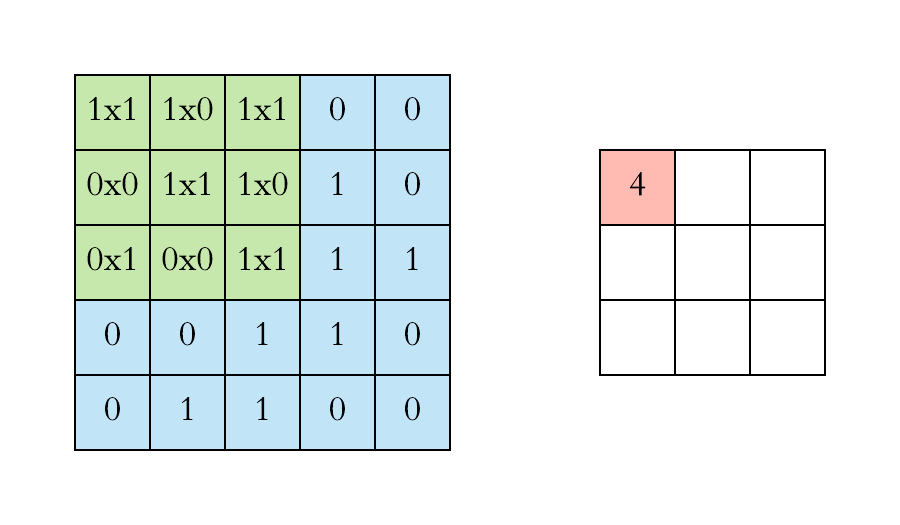

As for MNIST, there are three steps that we need to follow 
- First we need to build the network
- We then need to define the solver used 
- Finally we train the network

We can build a simple convolutional Neural network as follows:
    - Take the Sequential model (this is the conventional model)
    
The architecture of a convolutional neural network usually involves 4 parts:

   - Convolution
   - Pooling
   - Flattening
   - Fully connected layer

For the convolution part we will repeat __twice__ the following construction:
    
   - Add a first 2D convolutional layer (see https://keras.io/layers/convolutional/) with 64 3 by 3 filters and Relu activation function
    
   - To make the detection robust and to speed up the computation, a popular approach is to use MaxPooling (MaxPooling turns the output of the convolution layer into a reduced image by only retaining the max across a particular region). One intuition for maxPooling (given by Andrew Ng) is that if a feature (the ear of a cat/dog for example) is detected, is should be keps in the output (hence the max). Add a 2D maxPooling layer, after the convolutional layer, with 2 by 2 pooling windows
    
    
Then, following the conventional CNN structure we Flatten the result (see model.add(Flatten())). 

Finally, we add a dense layer of 64 neurons with Relu activation function. 

To define the final output, you can add a simple dense layer with only one neuron. As we only have two classes defined by a binary variable, we will choose our activation function to be the sigmoid. 


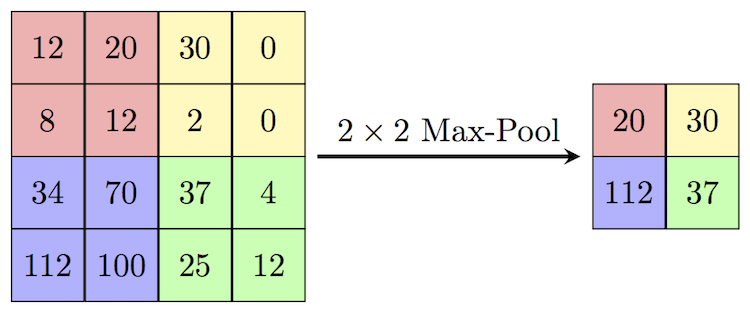

In [ ]:
# put the construction of the Keras network here



Now that we have built the network, we need to define our training algorithm. This is done with a call to model.compile (see https://keras.io/getting-started/sequential-model-guide/#compilation)

You can modify the parameters but to start, a good choice is to choose 'adam' as your solver, and the binary cross entropy as your loss. Also set metrics=['accuracy'] to keep track of the training error.

In [ ]:
# put your code here




You are now ready to train your model using a call to the 'fit' function of this model. Again up to you if you want to modify the parameters but a good start can be to take 10 epochs and to take a batch of size about 30. Also check the 'validation_split' argument (https://keras.io/models/sequential/). This might give you an indication of how well your model is doing through training. You might also want to only consider a subset of the image when training as the data set is quite large. 

In [ ]:
# put your code here
